## Combine Dataset Updated with 2024 Data

In [359]:
import csv
import requests
import pandas
from bs4 import BeautifulSoup

# URL of the NFL Combine Results page
url = "https://www.pro-football-reference.com/draft/2024-combine.htm"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the combine results
# table = soup.find('table', {'class': 'table table-striped table-hover table-bordered'})
table = soup.find('table', class_='sortable stats_table')

#create a csv
df = pandas.read_csv('nfl_combine_2010_to_2023.csv')
df.to_csv('nfl_combine_2010_to_2024.csv', index = False)

headers = [th.text.strip() for th in table.find_all('th')]

with open('nfl_combine_2010_to_2024.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the headers to the CSV file
    # writer.writerow(["Year", "Player", "Pos", "School", "Height", "Weight", "40yd", "Vertical", "Bench", "Broad Jump", "3Cone", "Shuttle", "Drafted", "Round", "Pick"])

    # Find all rows in the table body, skipping the first one
    rows = table.find_all('tr')[1:]

    # Iterate over each row
    for row in rows:
        # Extract data from each cell in the row
        cells = row.find_all(['td', 'th'])
        data = [cell.text.strip() for cell in cells]

        # Check if the row contains data
        if len(data) > 1:
            # Extract the player name from the first cell (index 0)
            player_name = cells[0].text.strip()
            # Insert the year as 2024 at the beginning of the data list
            data.insert(0, "2024")
            # Replace the player name with the properly extracted one
            data[1] = player_name
            # Skip the "College Stats" column
            data.pop(4)
            # Convert weight to float by adding ".0" to the end
            if data[5] != "Wt" and data[5]:
                data[5] = float(data[5]) + 0.0
            # # Update the "Drafted" column
            # data[12] = "True" if data[12] else "False"
            # Write the row data to the CSV file
            if data != ['2024', 'Player', 'Pos', 'School', 'Ht', 'Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', 'Drafted (tm/rnd/yr)']:
                writer.writerow(data)

In [360]:
import pandas as pd

# Load the dataset
df = pd.read_csv('nfl_combine_2010_to_2024.csv')

# Defining Power 5 conferences
power_5_conferences_schools = {
    "SEC": [
        "Alabama", "Arkansas", "Auburn", 
        "Florida", "Georgia", "Kentucky",
        "LSU", "Mississippi", "Mississippi State", "Mississippi St."
        "Missouri", "South Carolina", "Tennessee",
        "Texas A&M", "Vanderbilt"
    ],
    "ACC": [
        "Boston College", "Boston Col.", "Clemson", "Duke",
        "Florida State", "Florida St.", "Georgia Tech", "Louisville",
        "Miami", "NC State", "North Carolina State", "North Carolina",
        "Pittsburgh", "Syracuse", "Virginia",
        "Virginia Tech", "Wake Forest"
    ],
    "Big Ten": [
        "Illinois", "Indiana", "Iowa",
        "Maryland", "Michigan", "Michigan State", "Michigan St.",
        "Minnesota", "Nebraska", "Northwestern",
        "Ohio State", "Ohio St.", "Penn State", "Penn St.", "Purdue",
        "Rutgers", "Wisconsin"
    ],
    "Big 12": [
        "Baylor", "Iowa State", "Iowa St.", "Kansas",
        "Kansas State", "Kansas St.", "Oklahoma", "Oklahoma State", "Oklahoma St.",
        "TCU", "Texas", "Texas Tech", "West Virginia"
    ],
    "Pac-12": [
        "Arizona", "Arizona State", "Arizona St.", "California",
        "Colorado", "Oregon", "Oregon State", "Oregon St.",
        "Stanford", "UCLA", "USC",
        "Utah", "Washington", "Washington State", "Washington St."
    ]
}

# Flatten the list of Power 5 schools for filtering
power_5_schools_list = [school for schools in power_5_conferences_schools.values() for school in schools]

# Update the DataFrame to reflect whether a player is from a Power 5 school
df['Is_Power_5_School'] = df['School'].isin(power_5_schools_list)

# Calculate total unique schools and total players
total_unique_schools = df['School'].nunique()
total_players = len(df)

# Filter players based on Power 5 school status
players_from_power_5 = df[df['Is_Power_5_School'] == True]
players_not_from_power_5 = df[df['Is_Power_5_School'] == False]

# Counts of drafted and not drafted players from Power 5 schools
drafted_from_power_5 = players_from_power_5[players_from_power_5['Drafted'] == True].shape[0]
not_drafted_from_power_5 = players_from_power_5[players_from_power_5['Drafted'] == False].shape[0]

# Counts of drafted and not drafted players from non-Power 5 schools
drafted_not_from_power_5 = players_not_from_power_5[players_not_from_power_5['Drafted'] == True].shape[0]
not_drafted_not_from_power_5 = players_not_from_power_5[players_not_from_power_5['Drafted'] == False].shape[0]

# Calculating draft rates for Power 5 schools
draft_rate_from_power_5 = drafted_from_power_5 / (drafted_from_power_5 + not_drafted_from_power_5)
draft_rate_not_from_power_5 = drafted_not_from_power_5 / (drafted_not_from_power_5 + not_drafted_not_from_power_5)

# Printing each point
print(f"The dataset comprises {total_unique_schools} unique schools and a total of {total_players} players.")
print(f"From Power 5 schools, {drafted_from_power_5} players were drafted, and {not_drafted_from_power_5} were not drafted.")
print(f"From non-Power 5 schools, {drafted_not_from_power_5} players were drafted, and {not_drafted_not_from_power_5} were not drafted.")
print(f"Players from Power 5 schools have a draft rate of approximately {draft_rate_from_power_5*100:.2f}%.")
print(f"Players from non-Power 5 schools have a draft rate of about {draft_rate_not_from_power_5*100:.2f}%.")

The dataset comprises 308 unique schools and a total of 5062 players.
From Power 5 schools, 2242 players were drafted, and 1146 were not drafted.
From non-Power 5 schools, 766 players were drafted, and 587 were not drafted.
Players from Power 5 schools have a draft rate of approximately 66.17%.
Players from non-Power 5 schools have a draft rate of about 56.61%.


## Draft Rates between Power 5 Conferences' and Non-Power 5 Conferences' players within the Combine Stats

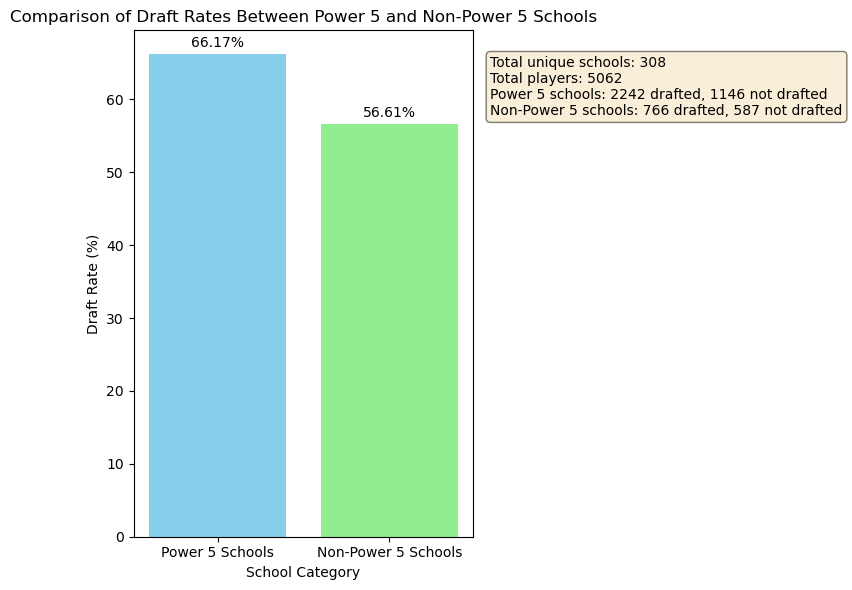

In [361]:
import matplotlib.pyplot as plt

categories = ['Power 5 Schools', 'Non-Power 5 Schools']
draft_rates = [draft_rate_from_power_5 * 100, draft_rate_not_from_power_5 * 100]  # Convert to percentages

# Creating the Bar Chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(categories, draft_rates, color=['skyblue', 'lightgreen'])

# Adding Title and Labels
ax.set_title('Comparison of Draft Rates Between Power 5 and Non-Power 5 Schools')
ax.set_ylabel('Draft Rate (%)')
ax.set_xlabel('School Category')

# Adding Draft Rates Above Bars for Clarity
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

# Text Box Content
text_str = '\n'.join([
    f"Total unique schools: {total_unique_schools}",
    f"Total players: {total_players}",
    f"Power 5 schools: {drafted_from_power_5} drafted, {not_drafted_from_power_5} not drafted",
    f"Non-Power 5 schools: {drafted_not_from_power_5} drafted, {not_drafted_not_from_power_5} not drafted"
])

# Adding Text Box to the Plot
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1.05, 0.95, text_str, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

## Power 5 Conference Players vs. Non-Power 5 Conference Players Draft Statistics

In [362]:
# For players that were drafted, calculate the average draft round for each Power 5 conference
# Ensure the 'Round' column is considered only for drafted players

# Add a column to identify the conference of each player's school, if it's in Power 5
def identify_conference(school):
    for conference, schools in power_5_conferences_schools.items():
        if school in schools:
            return conference
    return None

df['Conference'] = df['School'].apply(identify_conference)

# Filter out only drafted players
drafted_players = df[df['Drafted'] == True]

# Group by conference and calculate average draft round for those grouped players
average_draft_round_per_conference = drafted_players.groupby('Conference')['Round'].mean()


print("For the players that were drafted, here's the average draft round for each Power 5 conference:")
print(f"ACC: The average draft round is approximately {average_draft_round_per_conference['ACC']:.2f}.")
print(f"Big 12: The average draft round is approximately {average_draft_round_per_conference['Big 12']:.2f}.")
print(f"Big Ten: The average draft round is approximately {average_draft_round_per_conference['Big Ten']:.2f}.")
print(f"Pac-12: The average draft round is approximately {average_draft_round_per_conference['Pac-12']:.2f}.")
print(f"SEC: The average draft round is the lowest at approximately {average_draft_round_per_conference['SEC']:.2f}.")
print("This suggests that, on average, players from the SEC are drafted slightly earlier than those from other Power 5 conferences.")

# Calculate the average draft round for players from non-Power 5 schools who were drafted
players_not_from_power_5 = df[~df['School'].isin(power_5_schools_list)]
average_round_not_from_power_5 = players_not_from_power_5[players_not_from_power_5['Drafted'] == True]['Round'].mean()

# Print the calculated average draft round for non-Power 5 school players
print(f"\nPlayers from non-Power 5 schools were drafted, on average, in round {average_round_not_from_power_5:.2f}. This provides an interesting contrast to the draft rounds of players from Power 5 conferences, indicating the draft depth and variety of talent sourced from various institutions.")

For the players that were drafted, here's the average draft round for each Power 5 conference:
ACC: The average draft round is approximately 3.93.
Big 12: The average draft round is approximately 3.91.
Big Ten: The average draft round is approximately 3.73.
Pac-12: The average draft round is approximately 3.80.
SEC: The average draft round is the lowest at approximately 3.51.
This suggests that, on average, players from the SEC are drafted slightly earlier than those from other Power 5 conferences.

Players from non-Power 5 schools were drafted, on average, in round 4.15. This provides an interesting contrast to the draft rounds of players from Power 5 conferences, indicating the draft depth and variety of talent sourced from various institutions.


## Draft Round for Conference Groups

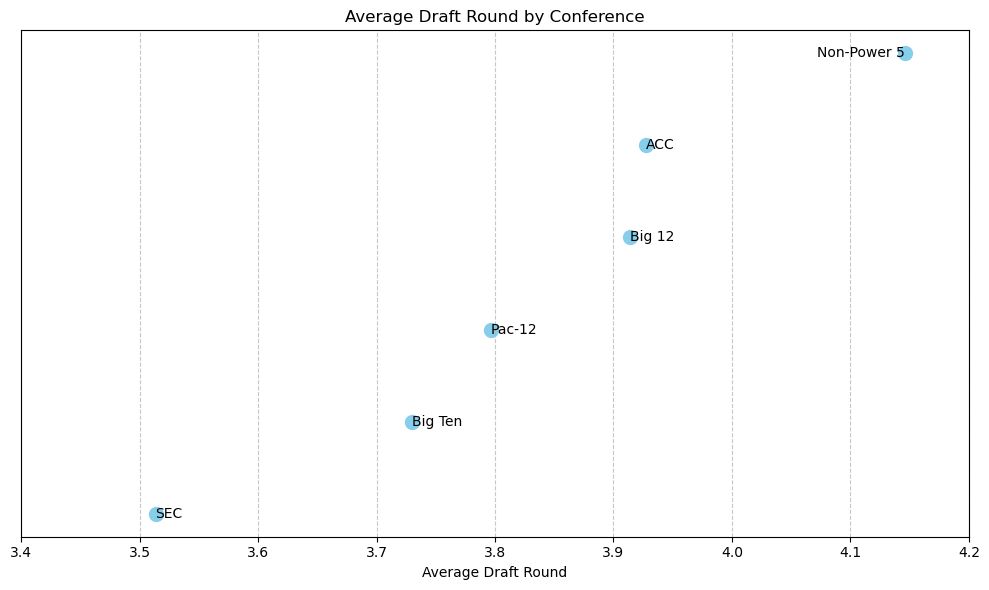

In [363]:
import matplotlib.pyplot as plt

# Set up x and y
average_draft_round_df = average_draft_round_per_conference.reset_index()
average_draft_round_df.columns = ['Conference', 'Average Draft Round']
non_power_5_row = pd.DataFrame([{'Conference': 'Non-Power 5', 'Average Draft Round': average_round_not_from_power_5}])
average_draft_round_df = pd.concat([average_draft_round_df, non_power_5_row], ignore_index=True)

# Ensure sort by 'Average Draft Round'
average_draft_round_df = average_draft_round_df.sort_values('Average Draft Round', ascending=True)

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(average_draft_round_df['Average Draft Round'], range(len(average_draft_round_df['Conference'])), color='skyblue', s=100)
for i, txt in enumerate(average_draft_round_df['Conference']):
    ax.text(average_draft_round_df['Average Draft Round'].iloc[i], i, txt, va='center', ha='right' if txt == 'Non-Power 5' else 'left')
ax.get_yaxis().set_visible(False)  
plt.xlabel('Average Draft Round')
plt.title('Average Draft Round by Conference')
plt.xlim(3.4, 4.2)  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Combine Drill Statistics by Conference and Player Position

In [364]:
# Grouping positions into broader categories
position_groups = {
    'WR': ['WR'],
    'RB': ['RB'],
    'QB': ['QB'],
    'TE': ['TE'],
    'DL': ['DE', 'DT', 'EDGE'],
    'OL': ['OT', 'OG', 'C', 'G'],
    'CB': ['CB'],
    'S': ['S', 'SAF'],
    'LB': ['LB', 'ILB', 'OLB']
}

# Mapping each player to a position group
def map_position_to_group(pos):
    for group, positions in position_groups.items():
        if pos in positions:
            return group
    return None

df['Position_Group'] = df['Pos'].apply(map_position_to_group)

# Filter out players from Power 5 conferences that were drafted
power_5_drafted_players = df[(df['Is_Power_5_School'] == True) & (df['Drafted'] == True)]

# Selecting the main combine drills
important_combine_drills = ['40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']

# Calculating the average for each combine drill statistic for each conference sorted by player position group
average_combine_stats = power_5_drafted_players.groupby(['Conference', 'Position_Group'])[important_combine_drills].mean().sort_index()

pivot_df = average_combine_stats.reset_index().pivot_table(index=['Position_Group', 'Conference'], values=['40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle'])

pivot_df

3Cone      40yd      Bench  Broad Jump  \
Position_Group Conference                                              
CB             ACC         6.937931  4.470000  14.736842  123.846154   
               Big 12      6.903333  4.489286  14.695652  122.863636   
               Big Ten     6.860588  4.449167  15.371429  124.944444   
               Pac-12      6.873448  4.491569  15.742857  122.461538   
               SEC         6.875938  4.463438  13.860465  122.481481   
DL             ACC         7.417949  4.880000  25.520833  112.212766   
               Big 12      7.460909  4.903143  25.033333  113.833333   
               Big Ten     7.363889  4.878630  25.133333  113.484375   
               Pac-12      7.347692  4.927059  27.886364  111.488372   
               SEC         7.445000  4.896061  25.123077  113.287356   
LB             ACC         7.100000  4.638205  22.935484  119.485714   
               Big 12      7.013158  4.641351  22.375000  119.000000   
               Big Ten     7.023333  4.663393  21.959184  119.538462   
               Pac-12      7.089310  4.674043  21.973684  118.275000   
               SEC         7.138611  4.652537  21.717391  120.049180   
OL             ACC         7.798108  5.224130  26.656250  103.225000   
               Big 12      7.719583  5.185758  25.137931  104.172414   
               Big Ten     7.772157  5.222623  25.340000  102.944444   
               Pac-12      7.668372  5.176182  25.651163  104.418605   
               SEC         7.843214  5.251860  25.389831  102.391304   
QB             ACC         7.110000  4.795556        NaN  112.833333   
               Big 12      7.071818  4.775000        NaN  115.285714   
               Big Ten     7.058889  4.801538        NaN  111.818182   
               Pac-12      7.079444  4.808500        NaN  113.000000   
               SEC         7.037143  4.805789        NaN  114.333333   
RB             ACC         7.102857  4.510323  19.750000  119.607143   
               Big 12      7.086667  4.520000  20.200000  122.052632   
               Big Ten     6.926842  4.520000  20.230769  119.964286   
               Pac-12      7.002174  4.526471  18.407407  119.724138   
               SEC         7.041111  4.538421  19.285714  119.775510   
S              ACC         6.933571  4.516154  18.208333  124.280000   
               Big 12      7.033333  4.518571  16.454545  120.583333   
               Big Ten     6.875333  4.508125  17.423077  121.107143   
               Pac-12      6.890625  4.524348  17.545455  121.478261   
               SEC         7.004000  4.546129  17.034483  122.466667   
TE             ACC         7.133000  4.743571  20.866667  117.928571   
               Big 12      7.131429  4.701429  21.000000  116.571429   
               Big Ten     7.121667  4.721250  19.720000  119.227273   
               Pac-12      7.086250  4.734583  19.090909  114.600000   
               SEC         7.191053  4.685417  20.421053  118.052632   
WR             ACC         6.963548  4.492273  14.687500  121.829268   
               Big 12      6.918077  4.468140  15.470588  123.536585   
               Big Ten     6.935429  4.473585  15.743590  122.914894   
               Pac-12      6.933846  4.504762  15.033333  120.894737   
               SEC         6.949318  4.460270  14.723404  123.277778   

                            Shuttle   Vertical  
Position_Group Conference                       
CB             ACC         4.203548  36.434211  
               Big 12      4.127500  36.363636  
               Big Ten     4.136667  37.027778  
               Pac-12      4.148485  35.768293  
               SEC         4.185000  35.394231  
DL             ACC         4.532195  32.204082  
               Big 12      4.565455  32.133333  
               Big Ten     4.450508  31.934783  
               Pac-12      4.449250  31.750000  
               SEC         4.570952  31.447674  
LB             ACC         4.316800  34.602941  
        

## Heat Map for Position-in-Conference Performance

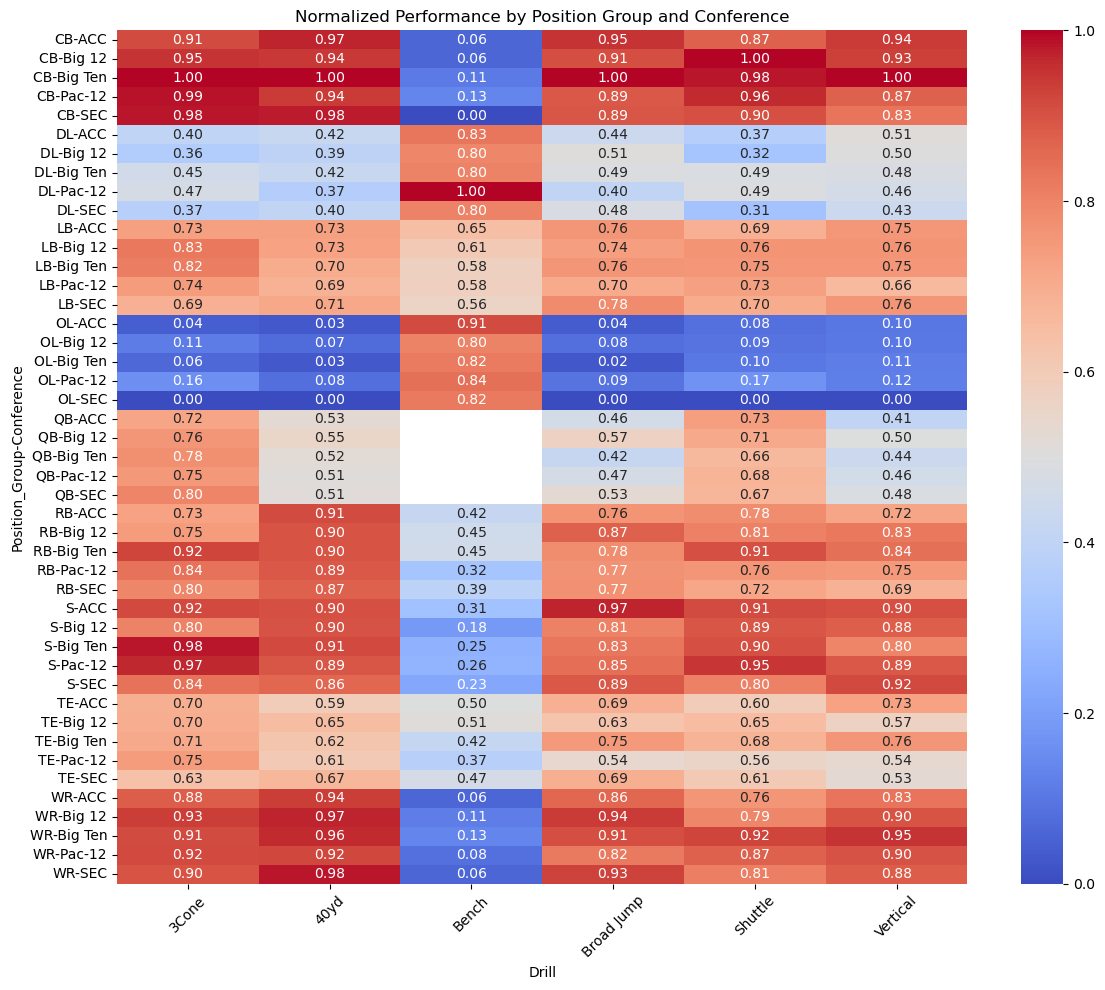

In [365]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pivot_df = pivot_df.reset_index()

data = pivot_df.melt(id_vars=['Position_Group', 'Conference'], var_name='Drill', value_name='Value')

# Define which drills are speed drills and which are power drills
speed_drills = ['40yd', '3Cone', 'Shuttle']
power_drills = ['Vertical', 'Bench', 'Broad Jump']

# For speed drills lower is better
data['Value'] = np.where(data['Drill'].isin(speed_drills), 1 / data['Value'], data['Value'])

min_values = data.groupby('Drill')['Value'].min()
max_values = data.groupby('Drill')['Value'].max()

# Apply normalization
data['Normalized_Value'] = data.apply(lambda x: (x['Value'] - min_values[x['Drill']]) / (max_values[x['Drill']] - min_values[x['Drill']]), axis=1)

# Create a pivot table for the heatmap
heatmap_data = data.pivot_table(index=['Position_Group', 'Conference'], columns='Drill', values='Normalized_Value')

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Normalized Performance by Position Group and Conference')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Logistic Regression for Feature Importance and Potential Drafting Outcome

              precision    recall  f1-score   support

           0       0.72      0.21      0.33       145
           1       0.69      0.95      0.80       261

    accuracy                           0.69       406
   macro avg       0.70      0.58      0.56       406
weighted avg       0.70      0.69      0.63       406



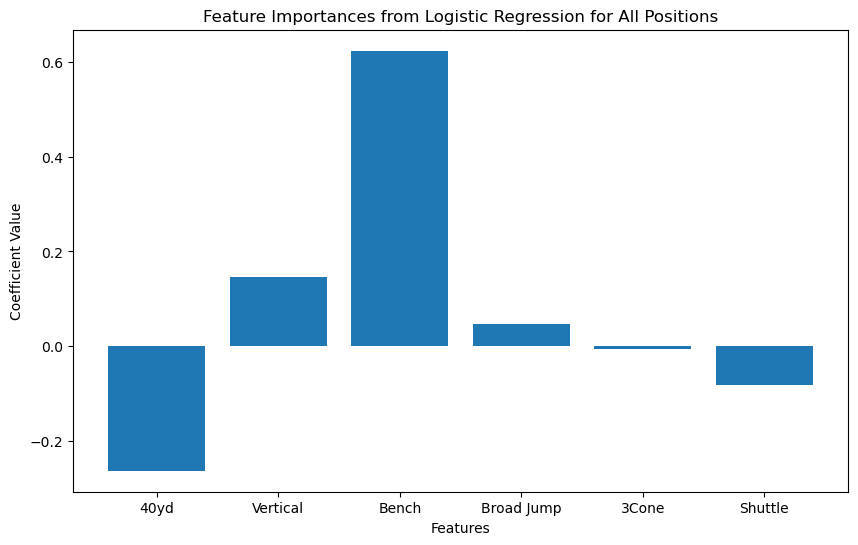

In [366]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Reads the dataset into a dataframe
df = pd.read_csv('nfl_combine_2010_to_2023.csv')

# Removes any entry rows that are missing values for the different features (combine drills)
df = df.dropna(subset=['40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle'])  # Ensure no NaN in features

# Splits the data into features and target variable
features = ['40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']
X = df[features]
y = df['Drafted'].astype(int)

# Splits the data into sets for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adds a scaler for feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

# Predictions and evaluation
predictions_lr = model_lr.predict(X_test_scaled)
print(classification_report(y_test, predictions_lr, zero_division=0))

# Visualize the coefficients as feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, model_lr.coef_[0])
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importances from Logistic Regression for All Positions')
plt.show()

In [367]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Read the data into a dataframe
ML_df = pd.read_csv('nfl_combine_2010_to_2024.csv')

# Discard NaN values for later computation
ML_df['Drafted'] = ML_df['Drafted'].fillna(-1)

# Splits the data into sets for training and prediction
train_data = ML_df[ML_df['Year'] < 2024].copy()
prediction_data = ML_df[ML_df['Year'] == 2024].copy() 

# Change drafted status to an integer
train_data = train_data.dropna(subset=['Drafted'])
train_data['Drafted'] = train_data['Drafted'].astype(int)

# Defines the features (drills) and the target y
features = ['40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']
X_train = train_data[features].dropna()
y_train = train_data.loc[X_train.index, 'Drafted']

# Fill in missing values for the features with NaN
numeric_features = prediction_data[features]
prediction_data.loc[:, features] = numeric_features.fillna(numeric_features.mean())
X_predict = prediction_data[features]

# Adds a scaler for feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_predict_scaled = scaler.transform(X_predict)

# Create and train the regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Define predictions based on the regression model and prediction data
predictions = model.predict(X_predict_scaled)

# Insert predictions into dataframe
prediction_data.loc[:, 'Predicted_Drafted'] = predictions

# Output the predictions
print("Predictions for 2024 players:")
print(prediction_data[['Year', 'Player', 'Predicted_Drafted']])

Predictions for 2024 players:
      Year              Player  Predicted_Drafted
4741  2024  Kris Abrams-Draine                  1
4742  2024        Isaiah Adams                  0
4743  2024         Rasheen Ali                  1
4744  2024           Erick All                  1
4745  2024       Braelon Allen                  1
...    ...                 ...                ...
5057  2024        Roman Wilson                  1
5058  2024         Mekhi Wingo                  1
5059  2024       Xavier Worthy                  1
5060  2024       Jaylen Wright                  1
5061  2024          Zak Zinter                  1

[321 rows x 3 columns]


## Random Forest for Feature Importance and Potential Drafting Outcome

              precision    recall  f1-score   support

           0       0.57      0.33      0.42       145
           1       0.70      0.86      0.77       261

    accuracy                           0.67       406
   macro avg       0.64      0.60      0.60       406
weighted avg       0.65      0.67      0.65       406



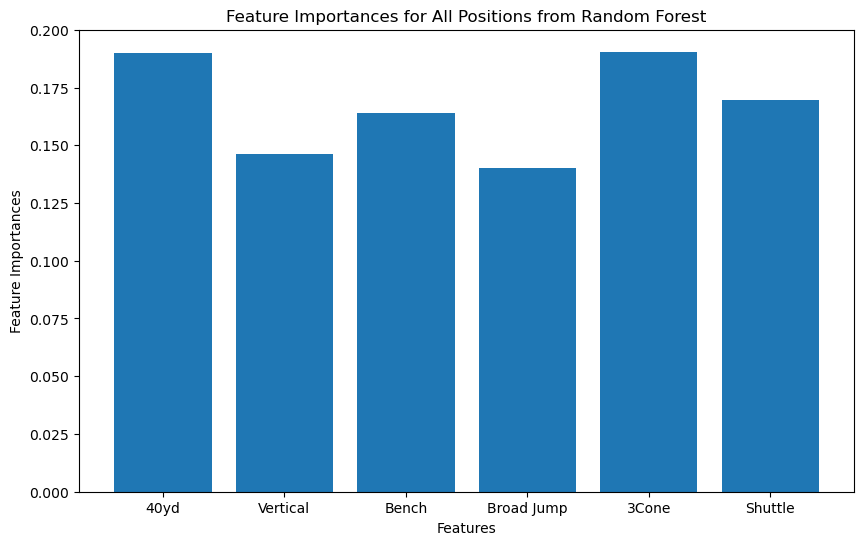

In [368]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Reads the dataset into a dataframe
df = pd.read_csv('nfl_combine_2010_to_2023.csv')

# Removes any entries that are missing values for the different features (combine drills)
df = df.dropna(subset=['40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle'])

# Define the features and target variable
features = ['40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']
X = df[features]
y = df['Drafted'].astype(int)

# Splits the data into sets for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adds a scaler for feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the random forest classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Define predictions based on the random forest model and prediction data
predictions_rf = model_rf.predict(X_test_scaled)
print(classification_report(y_test, predictions_rf, zero_division=0))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, model_rf.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Feature Importances')
plt.title('Feature Importances for All Positions from Random Forest')
plt.show()

In [369]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Reads the data into a dataframe
ML_df = pd.read_csv('nfl_combine_2010_to_2024.csv')

# Discard NaN values for later computation
ML_df['Drafted'] = ML_df['Drafted'].fillna(-1)

# Splits the data into sets for training and prediction
train_data = ML_df[ML_df['Year'] < 2024].copy()
prediction_data = ML_df[ML_df['Year'] == 2024].copy()  # Data for 2024

# Change drafted status to an integer
train_data = train_data.dropna(subset=['Drafted'])
train_data['Drafted'] = train_data['Drafted'].astype(int)

# Define features and target variable
features = ['40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']
X_train = train_data[features].dropna()
y_train = train_data.loc[X_train.index, 'Drafted']

# Fill in missing values for the features with NaN
numeric_features = prediction_data[features]
prediction_data.loc[:, features] = numeric_features.fillna(numeric_features.mean())

X_predict = prediction_data[features]

# Adds a scaler for feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_predict_scaled = scaler.transform(X_predict)

# Initialize and train the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Define predictions based on the random forest model
predictions = model_rf.predict(X_predict_scaled)

# Insert predictions into dataframe
prediction_data.loc[:, 'Predicted_Drafted'] = predictions

# Output the predictions
print("Predictions for 2024 players:")
print(prediction_data[['Year', 'Player', 'Predicted_Drafted']])

Predictions for 2024 players:
      Year              Player  Predicted_Drafted
4741  2024  Kris Abrams-Draine                  0
4742  2024        Isaiah Adams                  0
4743  2024         Rasheen Ali                  1
4744  2024           Erick All                  1
4745  2024       Braelon Allen                  1
...    ...                 ...                ...
5057  2024        Roman Wilson                  1
5058  2024         Mekhi Wingo                  1
5059  2024       Xavier Worthy                  1
5060  2024       Jaylen Wright                  1
5061  2024          Zak Zinter                  1

[321 rows x 3 columns]


## K-Means Clustering for Player Stats and Draft Rate Similarity

In [370]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Reads the data into a dataframe
df = pd.read_csv('nfl_combine_2010_to_2023.csv')

# Define the position groups
position_groups = {
    'WR': ['WR'],
    'RB': ['RB'],
    'QB': ['QB'],
    'TE': ['TE'],
    'DL': ['DE', 'DT', 'EDGE'],
    'OL': ['OT', 'OG', 'C', 'G'],
    'CB': ['CB'],
    'S': ['S', 'SAF'],
    'LB': ['LB', 'ILB', 'OLB']
}

# Maps each player to a position
def map_position_to_group(pos):
    for group, positions in position_groups.items():
        if pos in positions:
            return group
    return None

df['Position_Group'] = df['Pos'].apply(map_position_to_group)

# Drops the NaN values from the feature data
X = df[['40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', 'Player']].dropna()
df = df.loc[X.index] 

# Adds a scaler for normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop('Player', axis=1))

# Utilize K-Means Clustering
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters  

# Adds the stats hovering above each point in the plot
hover_text = []
for index, row in df.iterrows():
    hover_text.append(f"Player: {row['Player']}<br>"
                      f"Position: {row['Pos']}<br>"
                      f"Position Group: {row['Position_Group']}<br>"
                      f"40 Yard Dash: {row['40yd']} seconds<br>"
                      f"Vertical Jump: {row['Vertical']} inches<br>"
                      f"Bench Press: {row['Bench']} reps<br>"
                      f"Broad Jump: {row['Broad Jump']} inches<br>"
                      f"3 Cone Drill: {row['3Cone']} seconds<br>"
                      f"Shuttle Drill: {row['Shuttle']} seconds")

df['Hover_Text'] = hover_text

# Plot the results of clustering
fig = px.scatter(df, x='40yd', y='Vertical', color='Cluster', hover_name='Hover_Text',
                 title='Clusters of NFL Combine Participants', labels={'40yd': '', 'Vertical': ''},
                 color_continuous_scale='viridis', height=800)  

fig.update_xaxes(showticklabels=False)  
fig.update_yaxes(showticklabels=False) 

fig.show()

# Output the draft rate for each cluster
for i in range(5):
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i} Draft Rate: {cluster_data['Drafted'].mean()}")

Cluster 0 Draft Rate: 0.5344827586206896
Cluster 1 Draft Rate: 0.5616438356164384
Cluster 2 Draft Rate: 0.6538461538461539
Cluster 3 Draft Rate: 0.7151515151515152
Cluster 4 Draft Rate: 0.7723214285714286


## Decision Tree of Draft Statuses based on Combine Drill Stats

              precision    recall  f1-score   support

           0       0.59      0.41      0.48       158
           1       0.68      0.82      0.75       248

    accuracy                           0.66       406
   macro avg       0.64      0.61      0.61       406
weighted avg       0.65      0.66      0.64       406



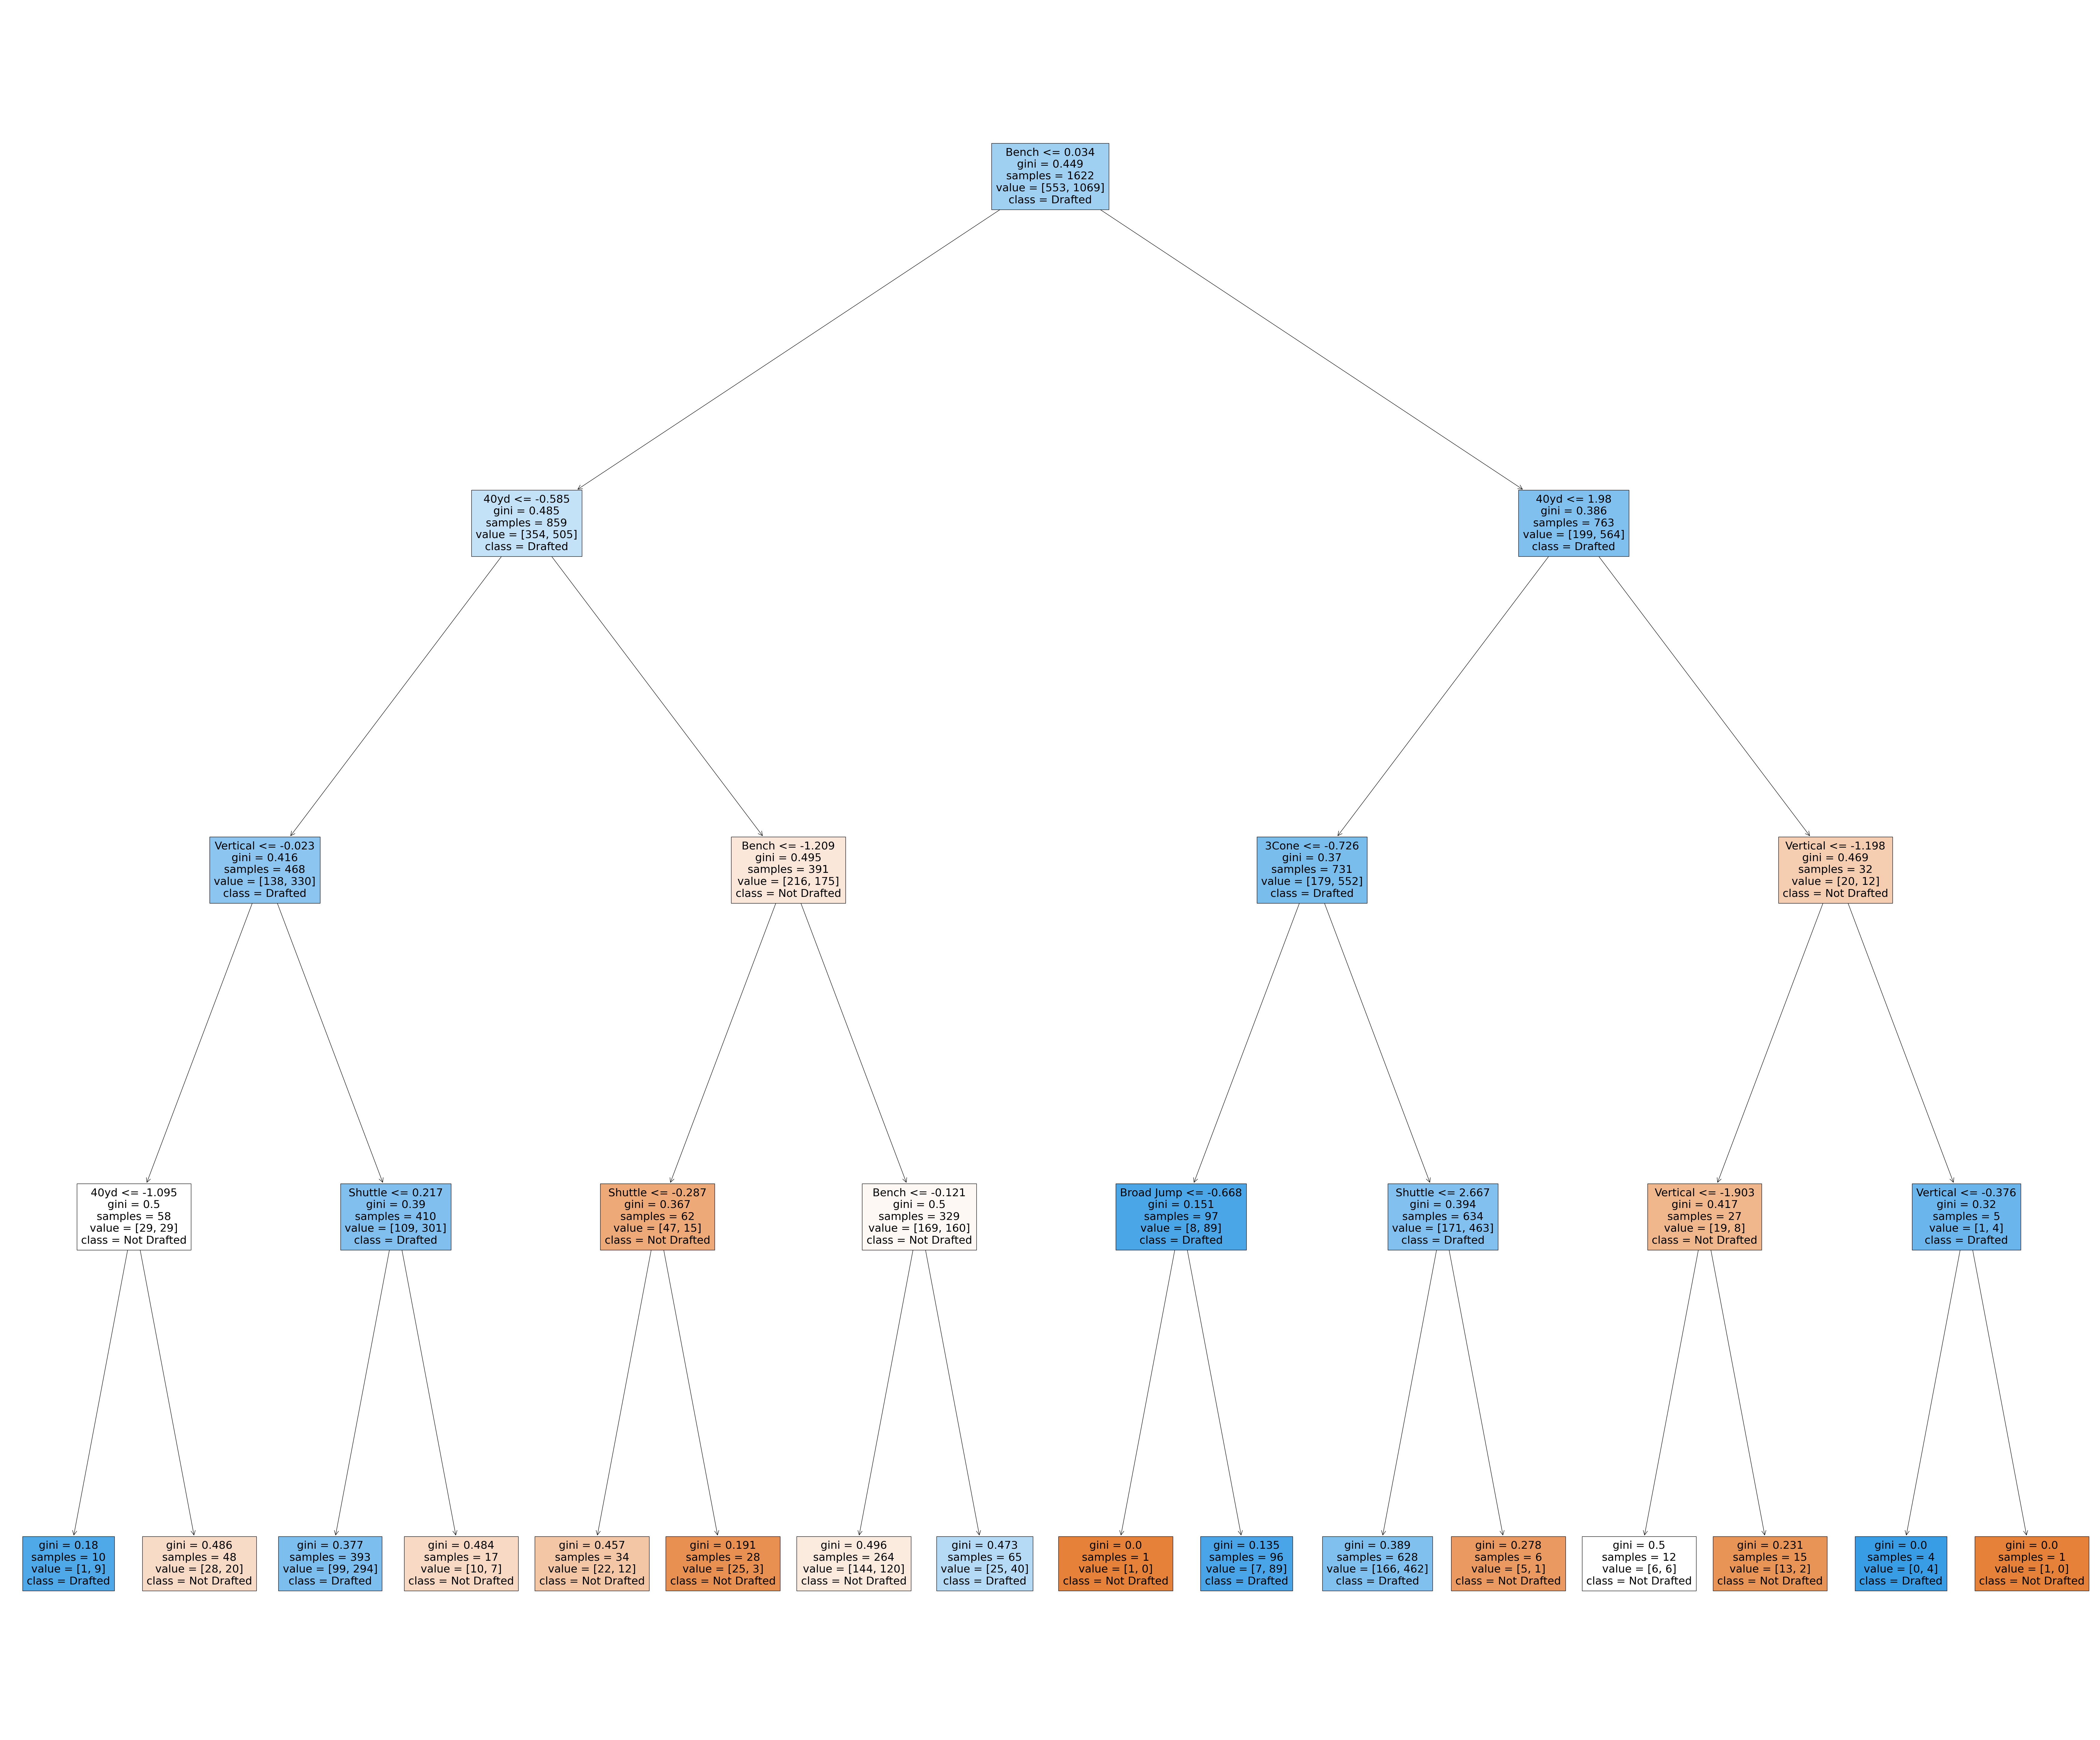

In [371]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Defines the features (drills) and the target y
drills = ['40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']
X = df[drills]
y = df['Drafted'].astype(int)

# Splits the data into sets for training and prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Adds a scaler for normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Utilize decision tree classifier model
decision_tree = DecisionTreeClassifier(max_depth=4)
decision_tree.fit(X_train_scaled, y_train)

# Use data to determine predictions
decision_tree_predictions = decision_tree.predict(X_test_scaled)
print(classification_report(y_test, decision_tree_predictions))

# Plot a visual representation of the decision tree
plt.figure(figsize=(90,75)) 
plot_tree(decision_tree, feature_names=drills, class_names=['Not Drafted', 'Drafted'], filled=True)
plt.show()

## Criteria for each node:
## Drill value - Looks at each drill's threshold, determined in training, and diverges based on if its <= (left) or > (right)
## Gini index - Impurity level in the context of class placement for the node
## Samples - The number of players taken into account for each node's drill value evaulation for class placement
## Value - Split of sample size (players) into 2 class categories: not drafted and drafted, respectively
## Class - Represents draft status, computed based on the ratio of not drafted to drafted from the value category